## Featurization and Model Tuning Project

### Data Description:
The actual concrete compressive strength (MPa) for a given mixture under a
specific age (days) was determined from laboratory. Data is in raw form (not scaled). The data has 8 quantitative input variables, and 1 quantitative output variable, and 1030 instances (observations).


### Domain:
Cement manufacturing

### Context:
Concrete is the most important material in civil engineering. The concrete compressive strength is a highly nonlinear function of age and ingredients. These ingredients include cement, blast furnace slag, fly ash, water, superplasticizer, coarse aggregate, and fine aggregate.

### Attribute Information:
 Cement : measured in kg in a m3 mixture  
 Blast : measured in kg in a m3 mixture  
 Fly ash : measured in kg in a m3 mixture  
 Water : measured in kg in a m3 mixture  
 Superplasticizer : measured in kg in a m3 mixture  
 Coarse Aggregate : measured in kg in a m3 mixture  
 Fine Aggregate : measured in kg in a m3 mixture  
 Age : day (1~365)  
 Concrete compressive strength measured in MPa  

### Import Libraries

In [1]:
import numpy as np
import pandas as pd 
import scipy.stats as stats
from math import sqrt

import matplotlib.pyplot as plt       
import seaborn as sns
%matplotlib inline

# Modelling
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge,LassoCV,RidgeCV


from sklearn.cluster import KMeans

from sklearn.model_selection import train_test_split, KFold, GridSearchCV, RandomizedSearchCV,cross_val_score
from yellowbrick.model_selection import ValidationCurve,LearningCurve
from yellowbrick.regressor import PredictionError,ResidualsPlot
from yellowbrick.regressor.alphas import alphas

from sklearn.utils import resample
from sklearn.metrics import make_scorer, mean_squared_error, r2_score,accuracy_score

C:\Users\gurup\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


### Load the Dataset

In [2]:
df = pd.read_csv('concrete.csv')
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


### Analyze Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement          1030 non-null float64
slag            1030 non-null float64
ash             1030 non-null float64
water           1030 non-null float64
superplastic    1030 non-null float64
coarseagg       1030 non-null float64
fineagg         1030 non-null float64
age             1030 non-null int64
strength        1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [4]:
print ("Rows     : " ,df.shape[0])
print ("Columns  : " ,df.shape[1])
print ("\nFeatures : \n" ,df.columns.tolist())
print("\n DataType : \n",df.dtypes)

Rows     :  1030
Columns  :  9

Features : 
 ['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg', 'fineagg', 'age', 'strength']

 DataType : 
 cement          float64
slag            float64
ash             float64
water           float64
superplastic    float64
coarseagg       float64
fineagg         float64
age               int64
strength        float64
dtype: object


### Missing Value Summary

In [5]:
df.isna().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [6]:
# There are no missing values in the dataset.

### Five Point Summary

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


### Univariate and MultiVariate Analysis Distribution

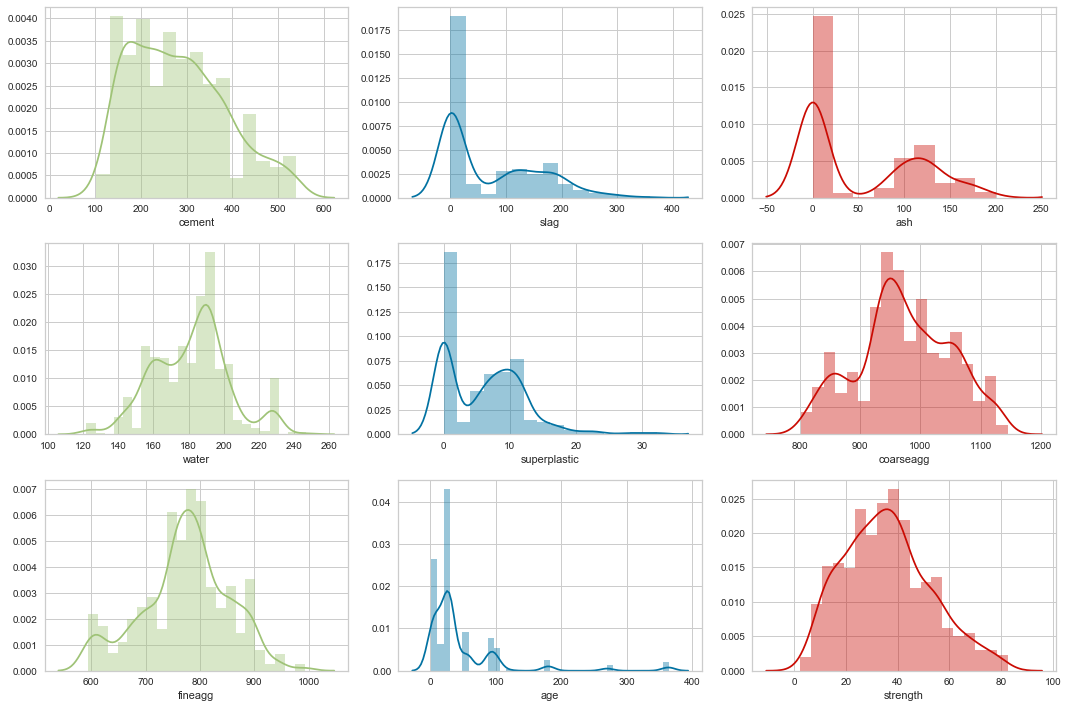

In [8]:
fig, axes = plt.subplots(nrows=3, ncols=3,figsize=(15,10))
colors = {0:'g', 1:'b', 2:'r'}
for i, column in enumerate(df.columns):
    sns.distplot(df[column],ax=axes[i//3,i%3],color=colors[i%3])
    plt.tight_layout() 

In [ ]:
#cement is almost normally distributed.
#slag has two gausssians and rightly skewed.
#ash has two gaussians and rightly skewed.
#water has three guassians and slighly left skewed.
#superplastic has two gaussians and rightly skewed.
#coarseagg has three guassians and almost normal.
#fineagg has almost two guassians and almost normal.
#age has multiple guassians and rightly skewed.

### Outlier Analysis, Imputation 

In [11]:
from scipy import stats; from scipy.stats import zscore, norm, randint
def outlier_plot(df,col):
    
    # define figure size
    plt.figure(figsize=(15,6))
    
    #histogram
    plt.subplot(1,3,1)
    sns.distplot(df[col],fit=norm,rug=True)
    plt.axvline(df[col].mean(),linestyle="dashed",label="mean", color='red')
    plt.axvline(df[col].median(),linestyle="dashed",label="median", color='green')
    plt.legend()
    
    #QQ plot
    plt.subplot(1,3,2)
    stats.probplot(df[col], dist="norm", plot=plt)
    
    #Boxplot
    plt.subplot(1,3,3)
    sns.boxplot(df[col])
     
    plt.show()
    
    q25,q75 = np.quantile(df[col],0.25),np.quantile(df[col],0.75)
    # calculate the IQR
    iqr = q75 - q25
    
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    
    #calculate the lower and upper value
    lower,upper = q25-cut_off,q75+cut_off
    print("IQR :",iqr)
    print("The lower bound :",lower)
    print("The upper bound:",upper)
    
    #calculate number of outliers
    
    count = df[df[col] < lower].shape[0] + df[df[col] > upper].shape[0] 
    print("Number of outliers:",count)
    print("Percentage of Outliers:",round((count/df.shape[0])*100,2))
    
    if count > 0:
        df[col] = np.where(df[col] > upper,df[col].mean(),np.where(df[col] < lower,df[col].mean(),df[col]))
            # define figure size
        plt.figure(figsize=(15,6))
    
        #histogram
        plt.subplot(1,3,1)
        sns.distplot(df[col],fit=norm,rug=True)
        plt.axvline(df[col].mean(),linestyle="dashed",label="mean", color='black')
        plt.axvline(df[col].median(),linestyle="dashed",label="median", color='green')
        plt.legend()
    
        #QQ plot
        plt.subplot(1,3,2)
        stats.probplot(df[col], dist="norm", plot=plt)
    
        #Boxplot
        plt.subplot(1,3,3)
        sns.boxplot(df[col])
    
        plt.show()
    

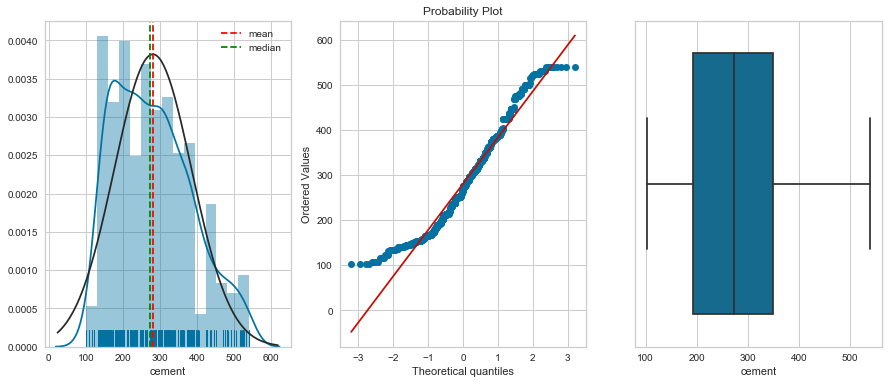

IQR : 157.625
The lower bound : -44.0625
The upper bound: 586.4375
Number of outliers: 0
Percentage of Outliers: 0.0


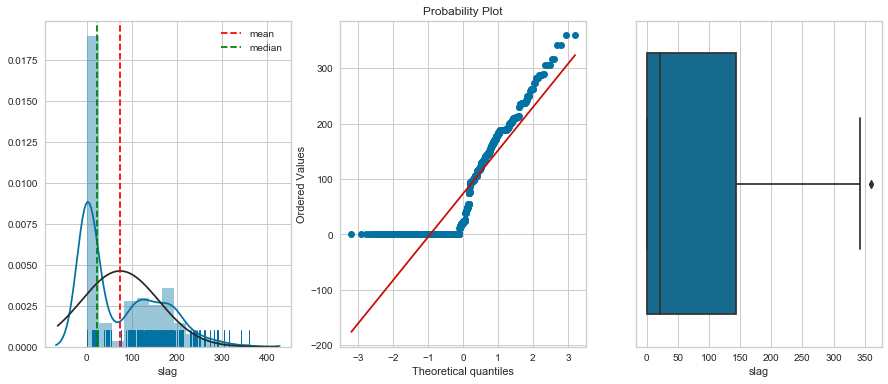

IQR : 142.95
The lower bound : -214.42499999999998
The upper bound: 357.375
Number of outliers: 2
Percentage of Outliers: 0.19


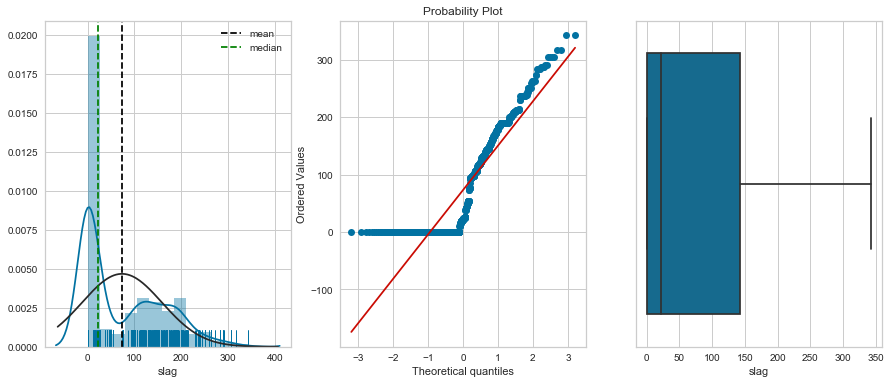

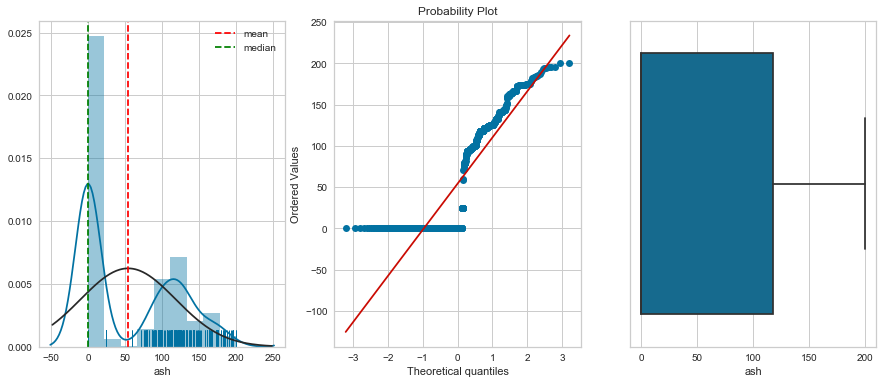

IQR : 118.3
The lower bound : -177.45
The upper bound: 295.75
Number of outliers: 0
Percentage of Outliers: 0.0


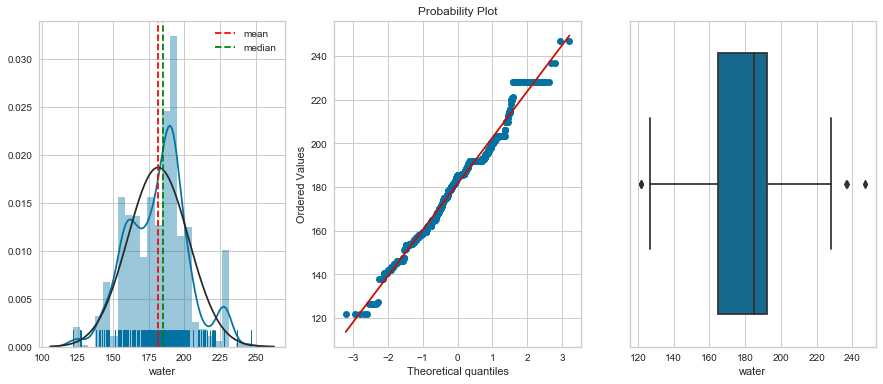

IQR : 27.099999999999994
The lower bound : 124.25000000000001
The upper bound: 232.64999999999998
Number of outliers: 9
Percentage of Outliers: 0.87


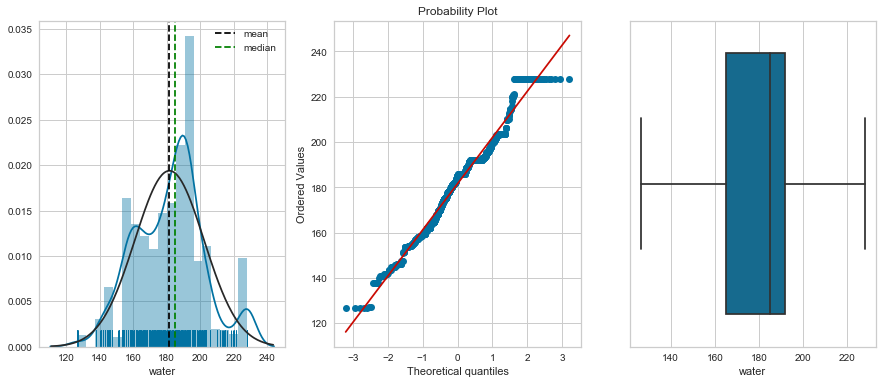

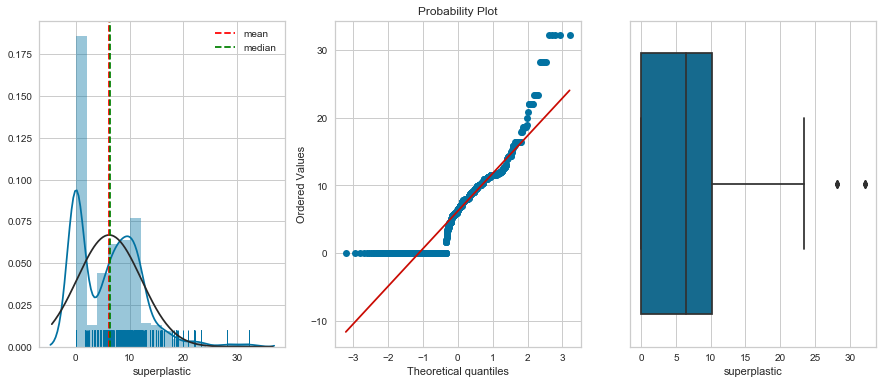

IQR : 10.2
The lower bound : -15.299999999999999
The upper bound: 25.5
Number of outliers: 10
Percentage of Outliers: 0.97


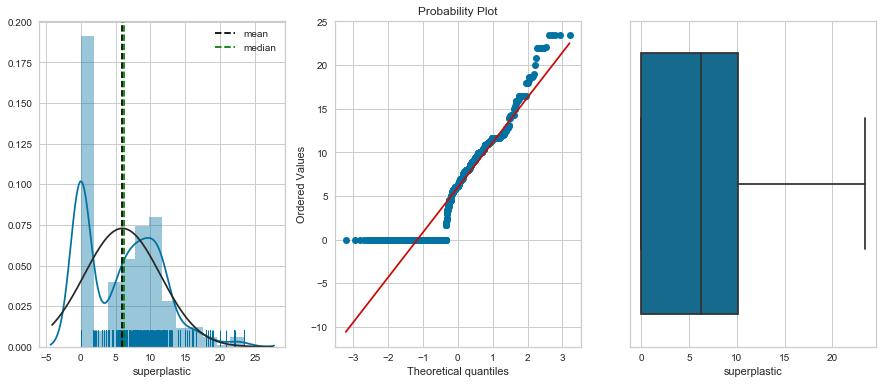

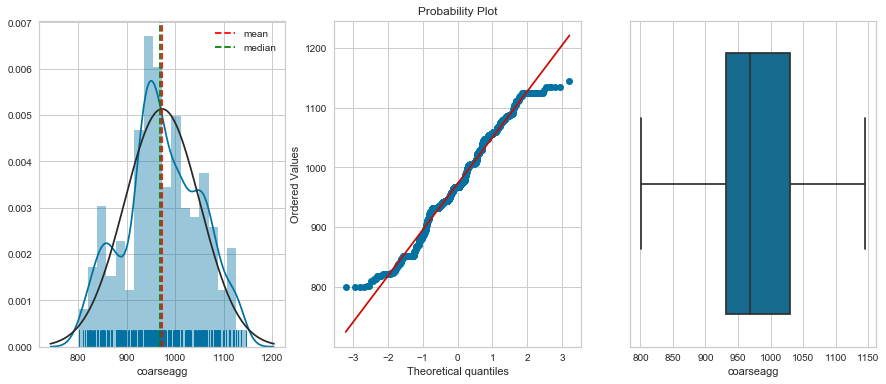

IQR : 97.40000000000009
The lower bound : 785.8999999999999
The upper bound: 1175.5000000000002
Number of outliers: 0
Percentage of Outliers: 0.0


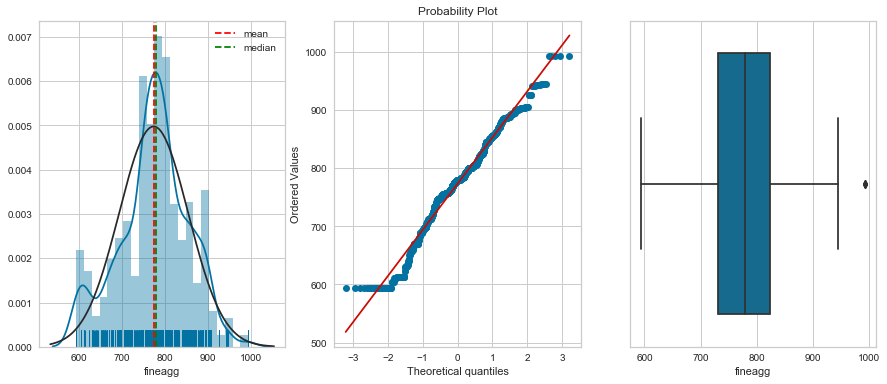

IQR : 93.05000000000007
The lower bound : 591.3749999999998
The upper bound: 963.575
Number of outliers: 5
Percentage of Outliers: 0.49


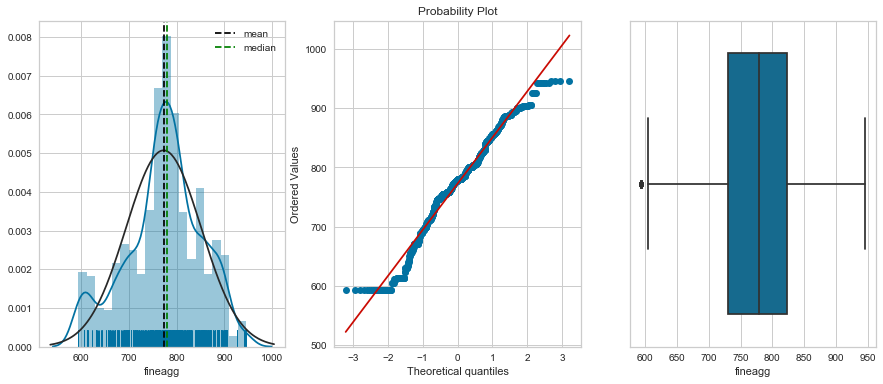

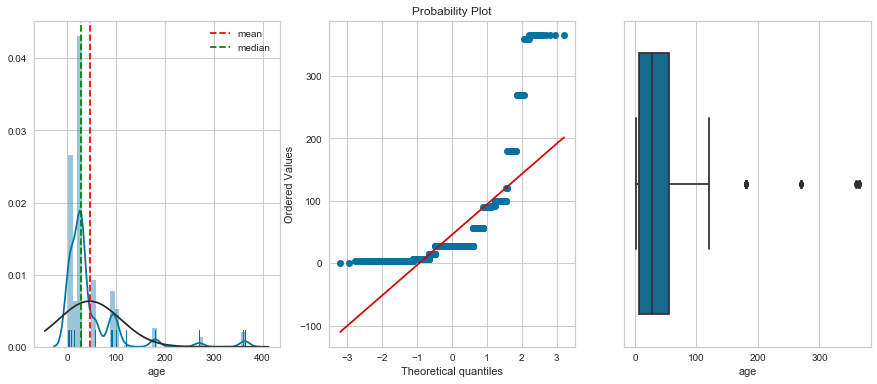

IQR : 49.0
The lower bound : -66.5
The upper bound: 129.5
Number of outliers: 59
Percentage of Outliers: 5.73


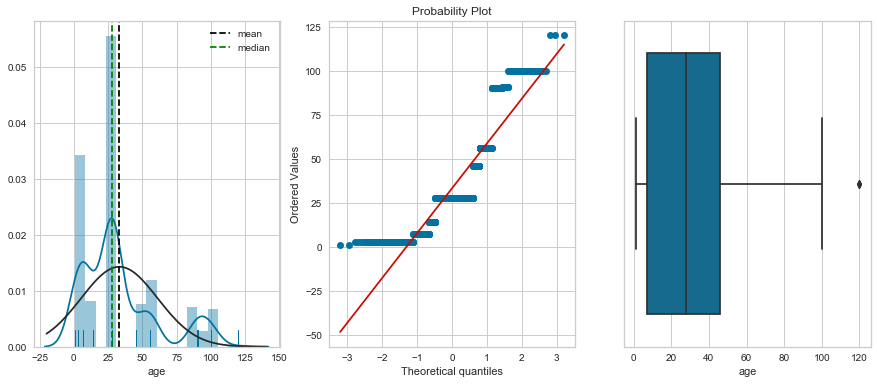

In [12]:
features_list = ['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg', 'fineagg', 'age']
for feature in features_list:
    outlier_plot(df,feature)

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.90000,350.000000,540.0
slag,1030.0,73.341448,85.354475,0.00,0.000,22.00000,142.725000,342.1
ash,1030.0,54.188350,63.997004,0.00,0.000,0.00000,118.300000,200.1
water,1030.0,181.623112,20.600807,126.60,164.900,185.00000,192.000000,228.0
superplastic,1030.0,5.971696,5.477051,0.00,0.000,6.20466,10.075000,23.4
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.00000,1029.400000,1145.0
fineagg,1030.0,772.517284,78.701767,594.00,730.950,778.90000,822.200000,945.0
age,1030.0,33.268025,27.951514,1.00,7.000,28.00000,45.662136,120.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.44500,46.135000,82.6


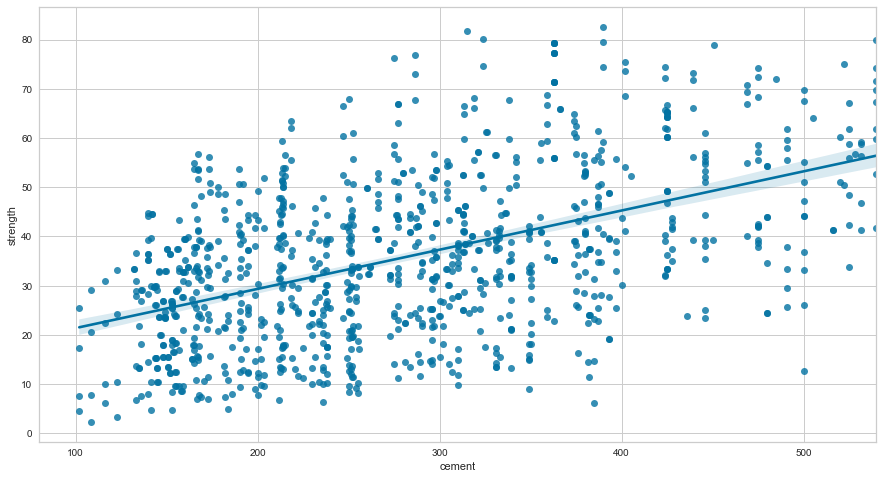

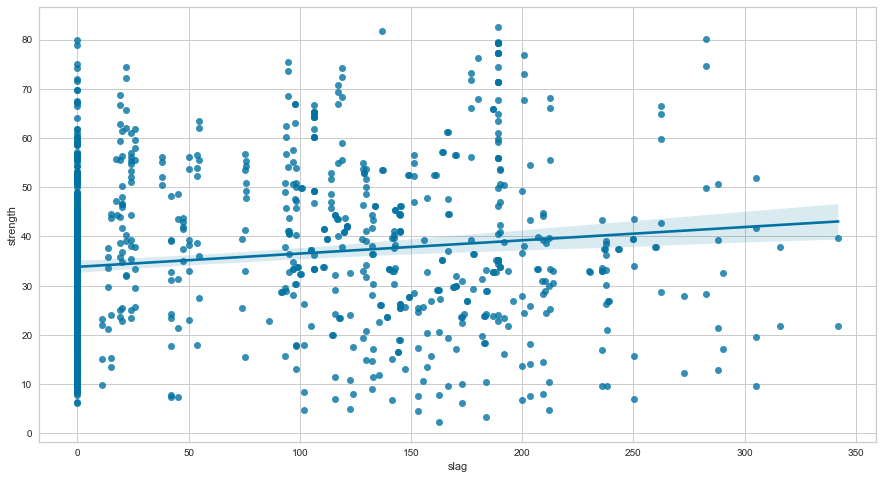

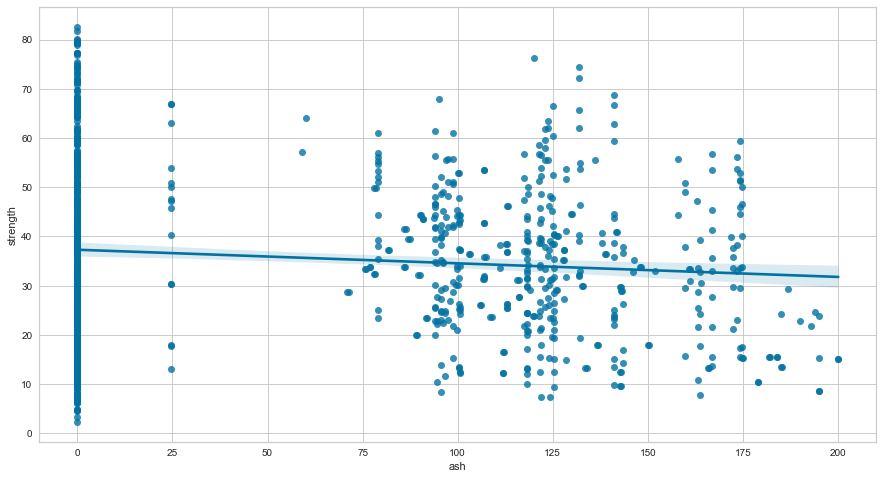

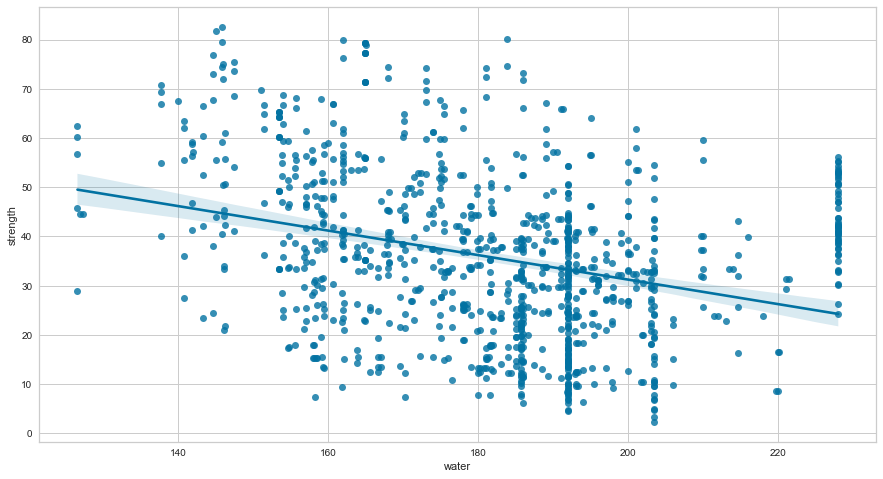

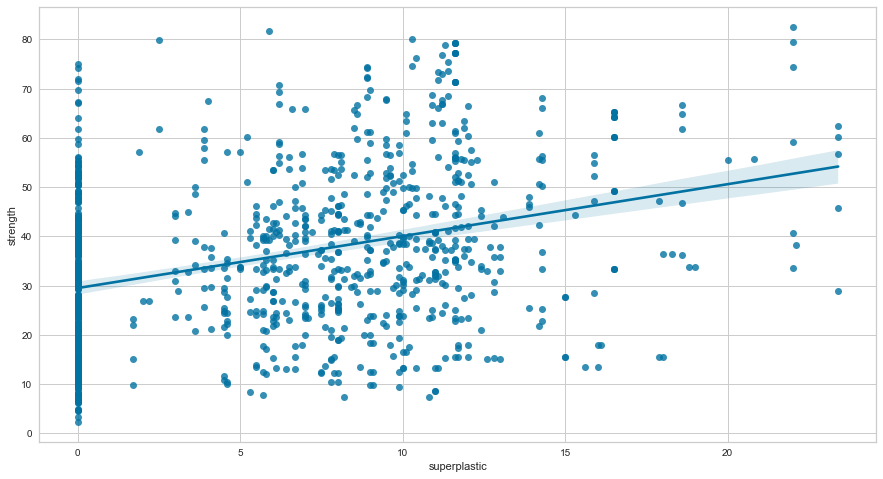

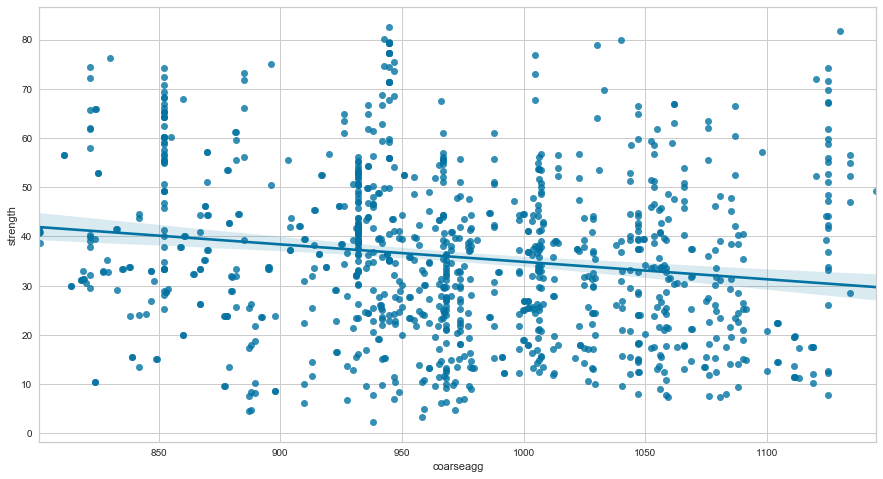

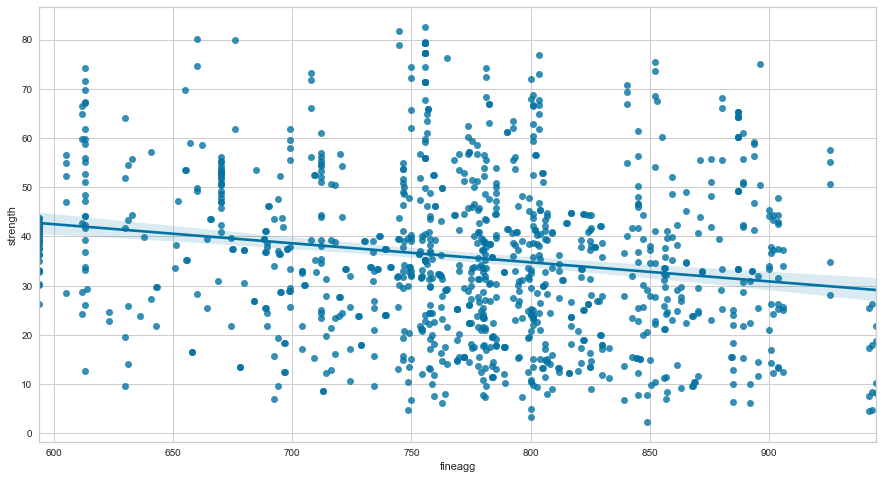

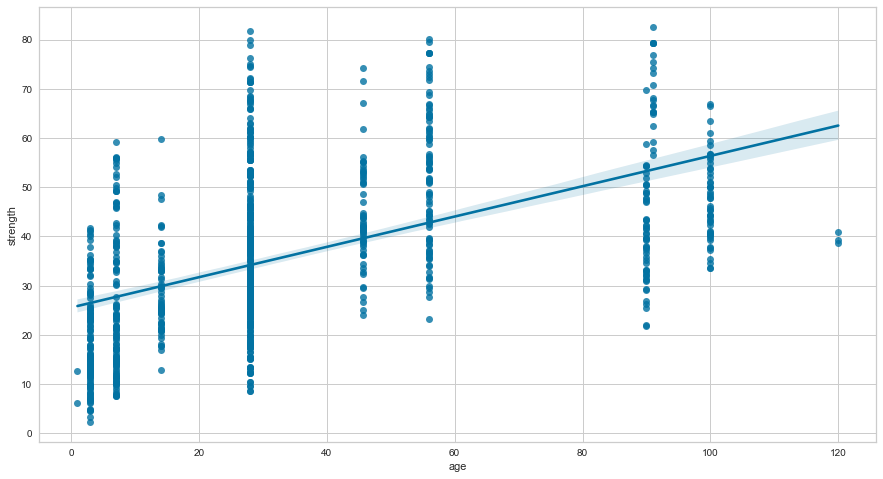

In [14]:
for col in list(df.columns)[:-1]:
    fig, ax1 = plt.subplots(figsize = (15, 8), ncols = 1, sharex = False)
    sns.regplot(x = df[col], y = df['strength'], ax = ax1)

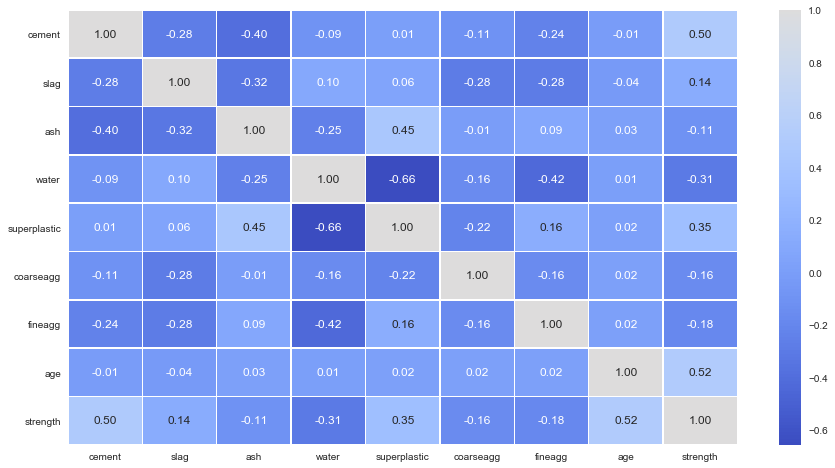

In [15]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.2f', center = 1 ,cmap='coolwarm')  # heatmap
plt.show()

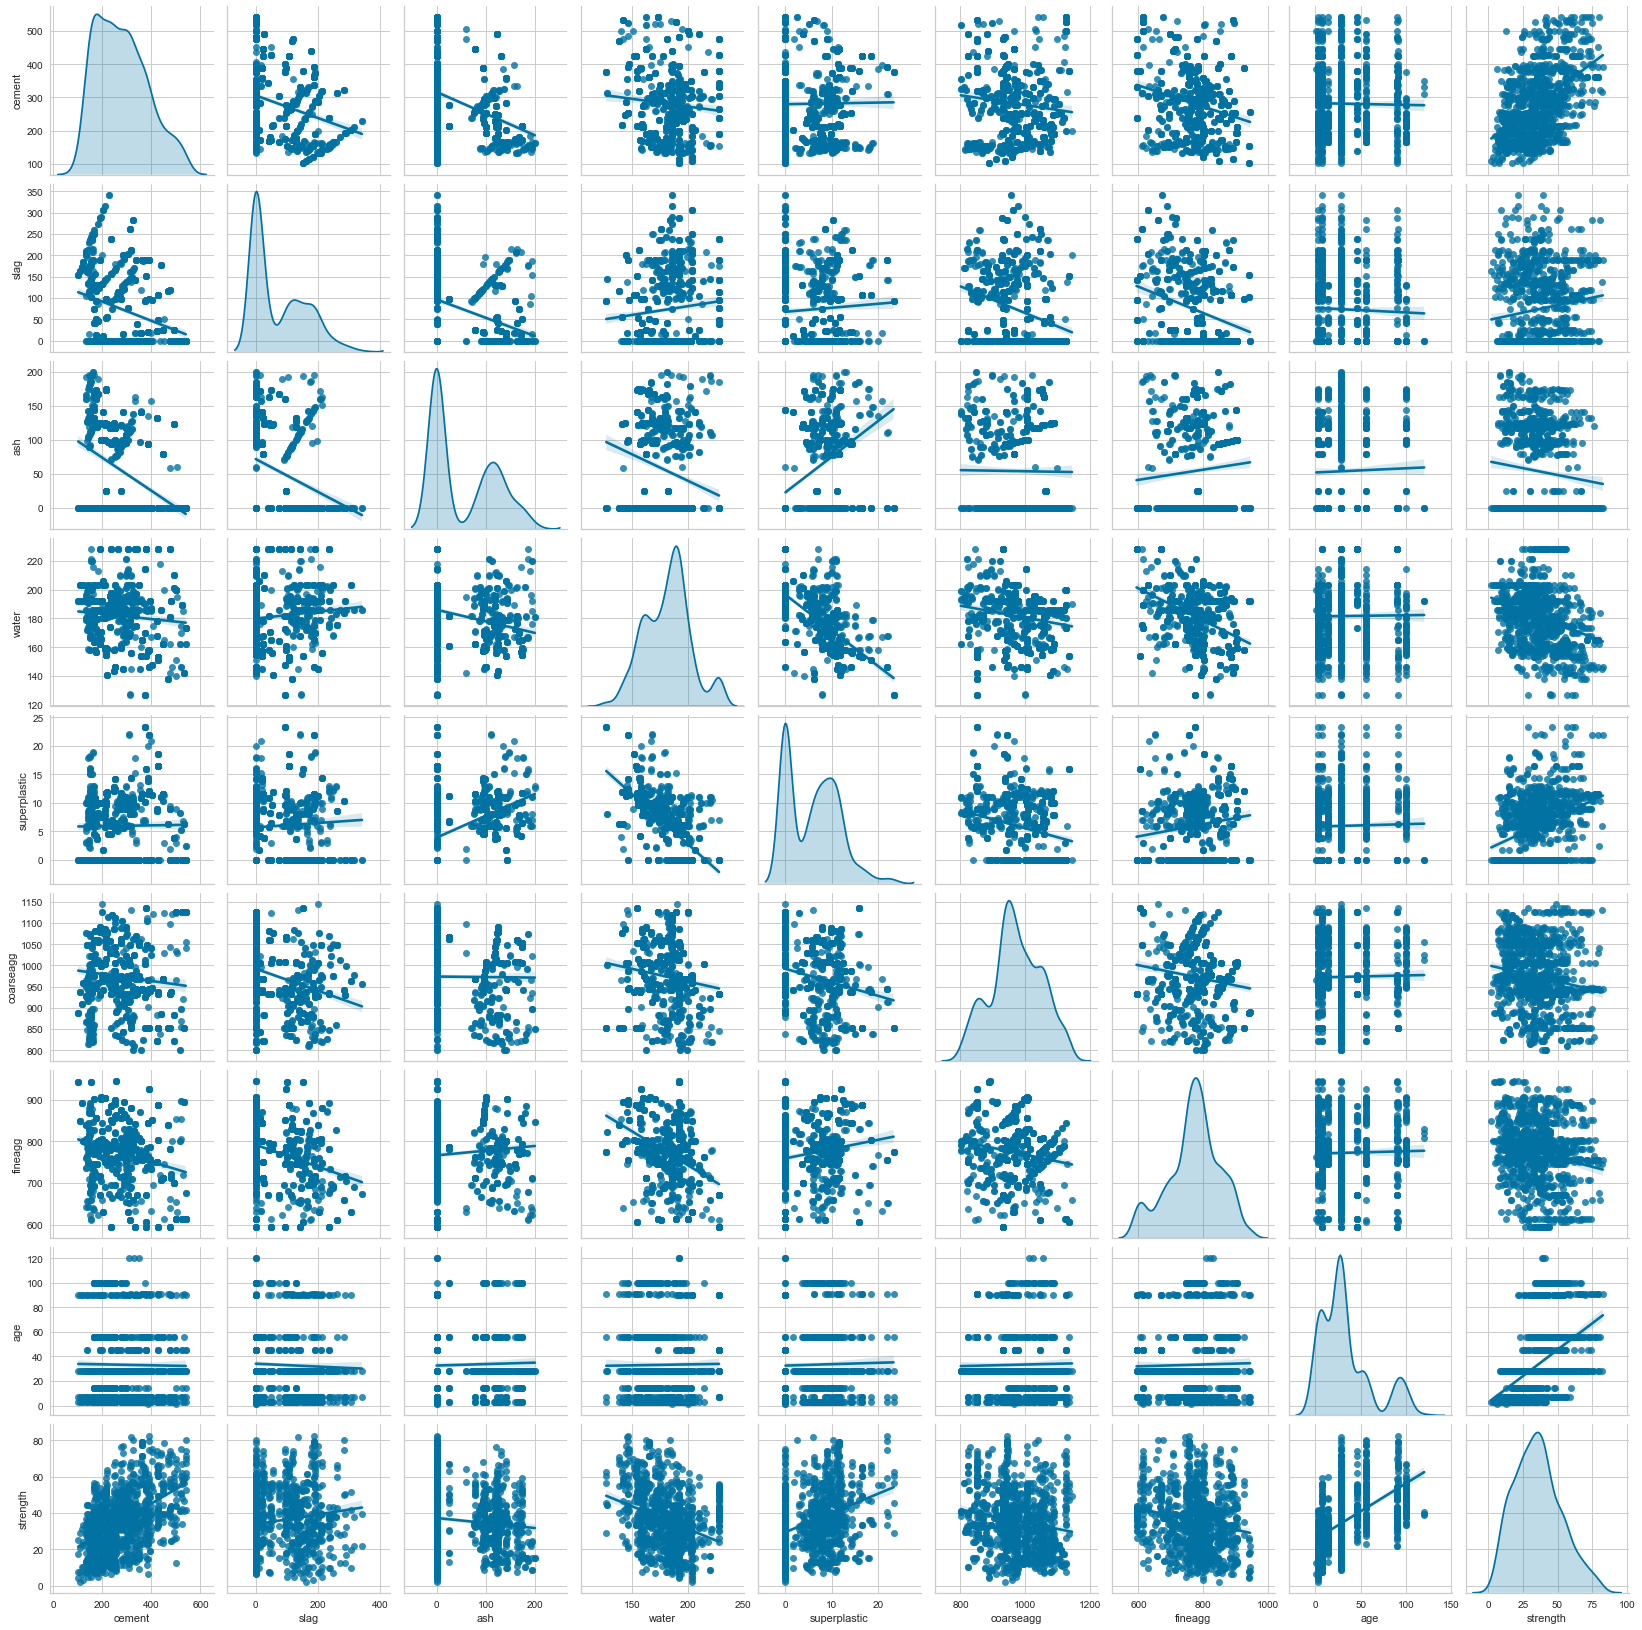

In [16]:
sns.pairplot(df,kind='reg',diag_kind='kde')

#### Cement has strong correlation with strength
#### Slag,ash, coarseagg and fineagg are also weak predictors
#### Water appears to have a negative correlation with strength
#### Superplastic appears to have positive correlation with strength
#### age also has strong correlation with strength

### K-Means Clustering

In [17]:
clusters_df = df.copy()
clusters_df=clusters_df.apply(zscore)
clusters_df = pd.DataFrame(clusters_df , columns  = df.columns)
display(clusters_df.head())
display(clusters_df.describe())

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,-1.339017,1.625292,-0.847144,1.062459,-1.090842,-0.014398,-0.305317,-0.188562,-0.355018
1,-1.074790,-0.365026,1.096078,-1.132696,0.881980,1.388141,0.301063,-0.689672,-0.737108
2,-0.298384,-0.859675,0.648965,0.280557,-0.086164,-0.206121,1.127367,-0.188562,-0.395144
3,-0.145209,0.476581,-0.847144,2.252311,-1.090842,-0.526517,-1.303237,-0.188562,0.600806
4,-1.209776,1.290056,-0.847144,0.567092,0.571443,0.958372,-0.963817,-0.188562,-1.049727


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03
mean,-3.858833e-16,2.494229e-16,3.634633e-16,8.852681e-16,1.672880e-16,7.116206e-16,-2.470516e-16,2.400453e-16,-3.729487e-17
std,1.000486e+00,1.000486e+00,1.000486e+00,1.000486e+00,1.000486e+00,1.000486e+00,1.000486e+00,1.000486e+00,1.000486e+00
min,-1.715253e+00,-8.596746e-01,-8.471439e-01,-2.672218e+00,-1.090842e+00,-2.212138e+00,-2.269377e+00,-1.154989e+00,-2.005552e+00
25%,-8.500535e-01,-8.596746e-01,-8.471439e-01,-8.121641e-01,-1.090842e+00,-5.265174e-01,-5.284186e-01,-9.402276e-01,-7.251305e-01
50%,-7.915193e-02,-6.018008e-01,-8.471439e-01,1.639998e-01,4.255531e-02,-6.329352e-02,8.113943e-02,-1.885617e-01,-8.222491e-02
75%,6.589606e-01,8.132820e-01,1.002278e+00,5.039574e-01,7.495452e-01,7.267605e-01,6.315849e-01,4.436301e-01,6.178744e-01
max,2.477915e+00,3.150264e+00,2.281084e+00,2.252311e+00,3.183606e+00,2.214224e+00,2.192664e+00,3.104451e+00,2.801717e+00


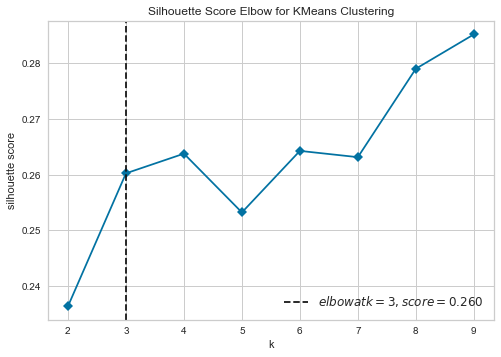

In [20]:
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(
    model, k=(2,10), metric='silhouette', timings=False
)

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()    

In [21]:
cluster = KMeans( n_clusters = 3 )
cluster.fit(clusters_df)
# Creating a new column "Cluster" which will hold the cluster id of each record
prediction=cluster.predict(clusters_df)
clusters_df["Cluster"] = prediction     
print(clusters_df.head())

     cement      slag       ash     water  superplastic  coarseagg   fineagg  \
0 -1.339017  1.625292 -0.847144  1.062459     -1.090842  -0.014398 -0.305317   
1 -1.074790 -0.365026  1.096078 -1.132696      0.881980   1.388141  0.301063   
2 -0.298384 -0.859675  0.648965  0.280557     -0.086164  -0.206121  1.127367   
3 -0.145209  0.476581 -0.847144  2.252311     -1.090842  -0.526517 -1.303237   
4 -1.209776  1.290056 -0.847144  0.567092      0.571443   0.958372 -0.963817   

        age  strength  Cluster  
0 -0.188562 -0.355018        1  
1 -0.689672 -0.737108        2  
2 -0.188562 -0.395144        2  
3 -0.188562  0.600806        1  
4 -0.188562 -1.049727        1  


<Figure size 1080x432 with 0 Axes>

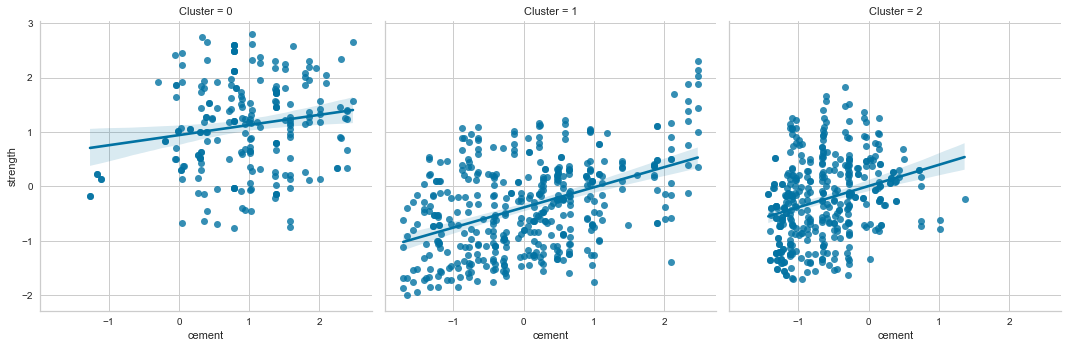

<Figure size 1080x432 with 0 Axes>

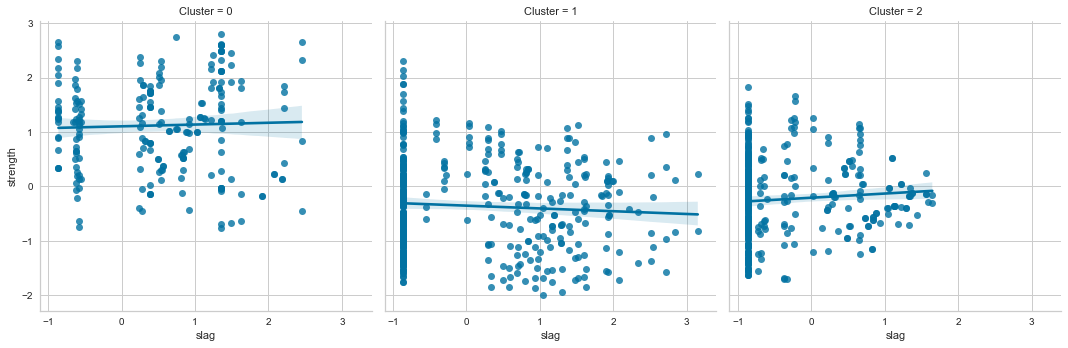

<Figure size 1080x432 with 0 Axes>

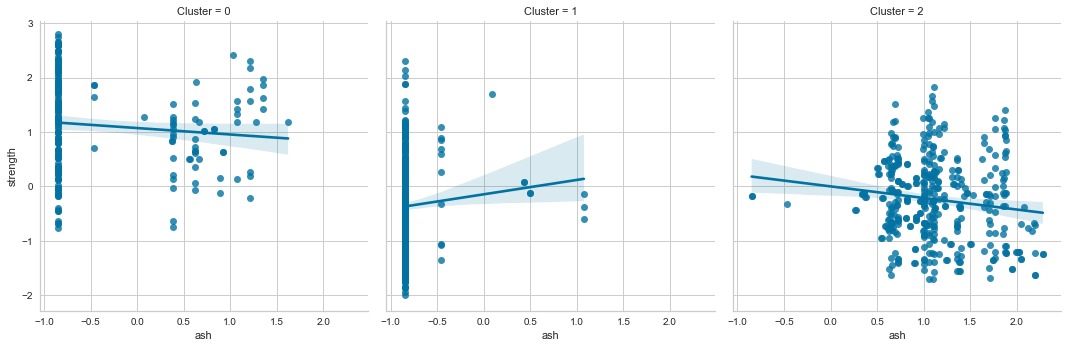

<Figure size 1080x432 with 0 Axes>

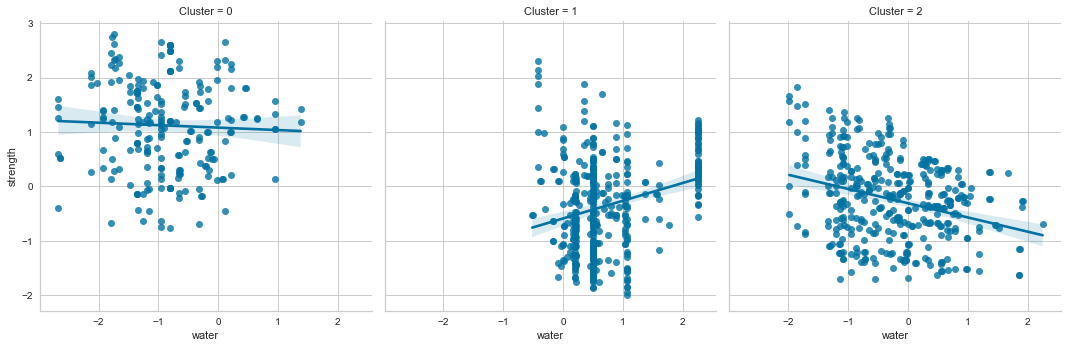

<Figure size 1080x432 with 0 Axes>

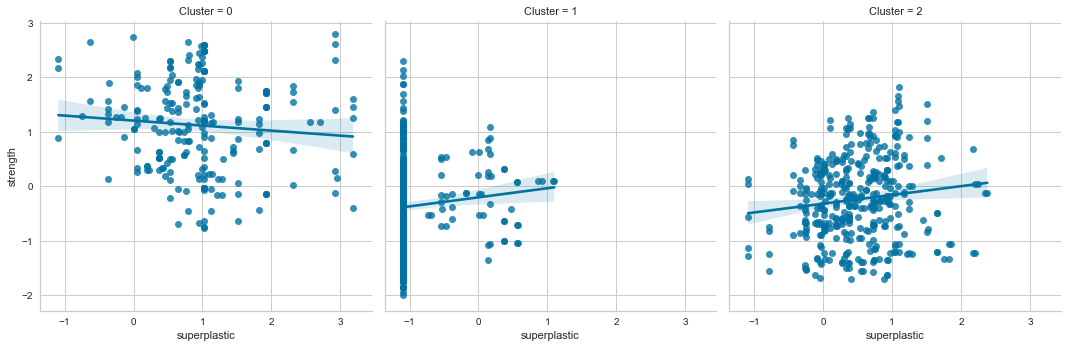

<Figure size 1080x432 with 0 Axes>

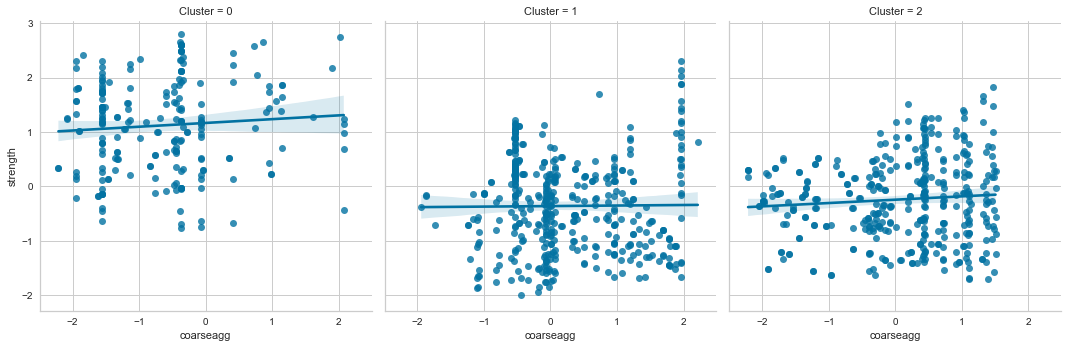

<Figure size 1080x432 with 0 Axes>

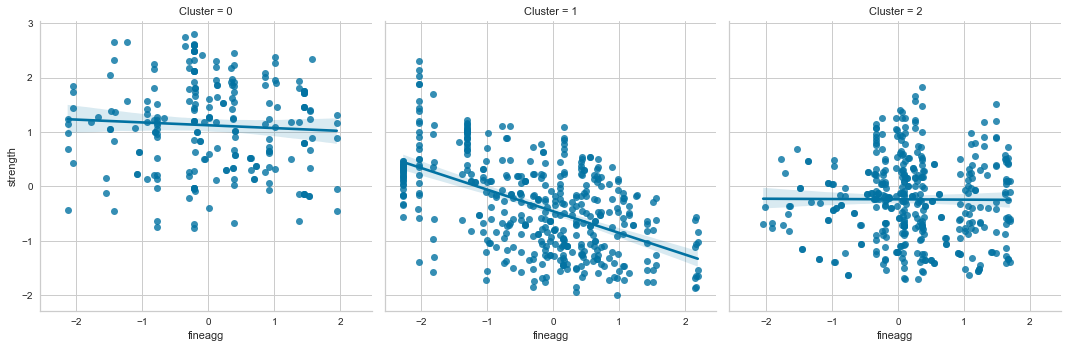

<Figure size 1080x432 with 0 Axes>

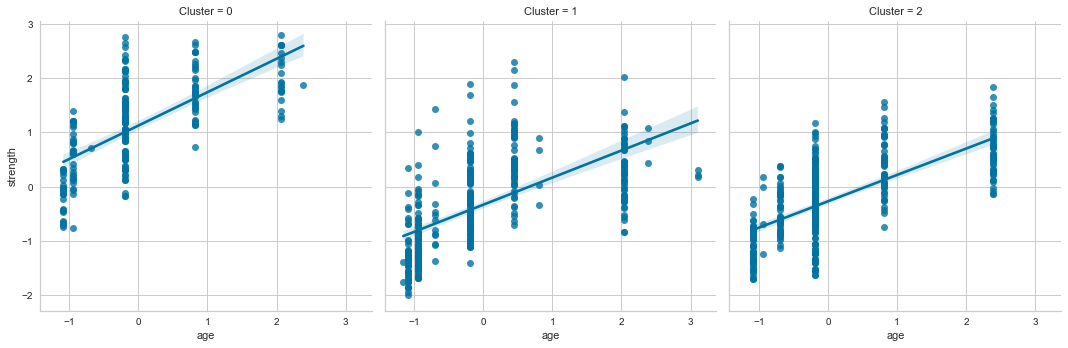

In [22]:
for col in list(df.columns)[:-1]:
    plt.figure(figsize=(15,6))
    sns.lmplot(x=col, y="strength", col="Cluster", data=clusters_df)    

#### Cement , Water, superplastic, and age looks to be good predictor.

### Baseline Model

In [19]:
# Training and test sets 
X = df.drop('strength', axis = 1)
y = df['strength']
print("features_list:",features_list)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
print('Shape of train and test datasets:',X_train.shape, y_train.shape, X_test.shape, y_test.shape)

features_list: ['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg', 'fineagg', 'age']
Shape of train and test datasets: (721, 8) (721,) (309, 8) (309,)


In [23]:
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('Ridge', Ridge()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('SVR', SVR()))
models.append(('DecisionTree', DecisionTreeRegressor()))
models.append(('RandomForest',  RandomForestRegressor()))
models.append(('ExtraTrees', ExtraTreesRegressor()))
models.append(('AdaBoost', AdaBoostRegressor()))
models.append(('GradientBoost', GradientBoostingRegressor()))

In [24]:
RMSE = [] ;MSE = [] ; MAE = [] ;R2 = [] ; names = []

for name, model in models:
    kfold = KFold(n_splits=5)
    # Evaluate RMSE
    RMSE.append(np.sqrt((-1) * cross_val_score(model, X_train, y_train, cv=kfold, 
                                               scoring='neg_mean_squared_error').mean()))
    # Evaluate RMSE
    MSE.append((-1) * cross_val_score(model, X_train, y_train, cv=kfold, 
                                               scoring='neg_mean_squared_error').mean())
    # Evaluate MAE
    MAE.append((-1) * cross_val_score(model, X_train, y_train, cv=kfold, 
                                               scoring='neg_mean_absolute_error').mean())
    # Evaluate R2
    R2.append(cross_val_score(model, X_train, y_train, cv=kfold, scoring='r2').mean())

    names.append(name)


evaluation = pd.DataFrame({'Model': names,
                           'RMSE': RMSE,
                           'MSE': MSE,
                           'MAE': MAE,
                           'R2': R2})
evaluation

,Model,RMSE,MSE,MAE,R2
0,LR,8.640999,74.666860,6.613274,0.734261
1,LASSO,8.644992,74.735880,6.617552,0.734025
2,Ridge,8.640996,74.666815,6.613272,0.734262
3,KNN,9.716580,94.411933,7.429595,0.663402
4,SVR,15.012511,225.375476,12.059625,0.202122
5,DecisionTree,8.007847,59.614419,5.166593,0.779870
6,RandomForest,5.736276,32.231432,3.975974,0.883776
7,ExtraTrees,5.342937,28.160644,3.530171,0.898721
8,AdaBoost,7.928851,62.363244,6.455261,0.764846
9,GradientBoost,5.429930,29.440584,3.960620,0.894695


### Model with Standardization

In [25]:
pipelines = []
pipelines.append(('LR', Pipeline([('Scaler', StandardScaler()),('LR',LinearRegression())])))
pipelines.append(('Ridge', Pipeline([('Scaler', StandardScaler()),('Ridge',Ridge())])))
pipelines.append(('LASSO', Pipeline([('Scaler', StandardScaler()),('LASSO',Lasso())])))
pipelines.append(('KNN', Pipeline([('Scaler', StandardScaler()),('KNN',KNeighborsRegressor())])))
pipelines.append(('SVR', Pipeline([('Scaler', StandardScaler()),('SVR',SVR(kernel='linear'))])))
pipelines.append(('DecisionTree', Pipeline([('Scaler', StandardScaler()),('DecisionTree',DecisionTreeRegressor())])))
pipelines.append(('RandomForest', Pipeline([('Scaler', StandardScaler()),('RandomForest', RandomForestRegressor())])))
pipelines.append(('ExtraTrees', Pipeline([('Scaler', StandardScaler()),('ExtraTrees', ExtraTreesRegressor())])))
pipelines.append(('AdaBoost', Pipeline([('Scaler', StandardScaler()),('AdaBoost', AdaBoostRegressor())])))
pipelines.append(('GradientBoost', Pipeline([('Scaler', StandardScaler()),('GradientBoost', GradientBoostingRegressor())])))

In [26]:
RMSE = [] ;MSE = [] ; MAE = [] ;R2 = [] ; names = [] ; r2_results = []

for name, model in pipelines:
    kfold = KFold(n_splits=5)

    # Evaluate RMSE
    RMSE.append(np.sqrt((-1) * cross_val_score(model, X_train, y_train, cv=kfold, 
                                               scoring='neg_mean_squared_error').mean()))
    # Evaluate RMSE
    MSE.append((-1) * cross_val_score(model, X_train, y_train, cv=kfold, 
                                               scoring='neg_mean_squared_error').mean())
    # Evaluate MAE
    MAE.append((-1) * cross_val_score(model, X_train, y_train, cv=kfold, 
                                               scoring='neg_mean_absolute_error').mean())
    # Evaluate R2
    R2.append(cross_val_score(model, X_train, y_train, cv=kfold, scoring='r2').mean())
    
    r2_results.append(cross_val_score(model, X_train, y_train, cv=kfold, scoring='r2'))
    
    names.append(name)


evaluation = pd.DataFrame({'Model': names,
                           'RMSE': RMSE,
                           'MSE': MSE,
                           'MAE': MAE,
                           'R2': R2})
evaluation

,Model,RMSE,MSE,MAE,R2
0,LR,8.640999,74.666860,6.613274,0.734261
1,Ridge,8.639499,74.640935,6.613595,0.734356
2,LASSO,9.069615,82.257909,7.067276,0.707831
3,KNN,8.664346,75.070894,6.602405,0.732875
4,SVR,8.662982,75.047252,6.603430,0.733116
5,DecisionTree,7.865945,62.382189,5.197075,0.789467
6,RandomForest,5.693146,32.817549,4.030950,0.883331
7,ExtraTrees,5.375099,27.865065,3.545800,0.897495
8,AdaBoost,7.892167,63.992244,6.375734,0.771429
9,GradientBoost,5.429279,29.528237,3.959653,0.894870


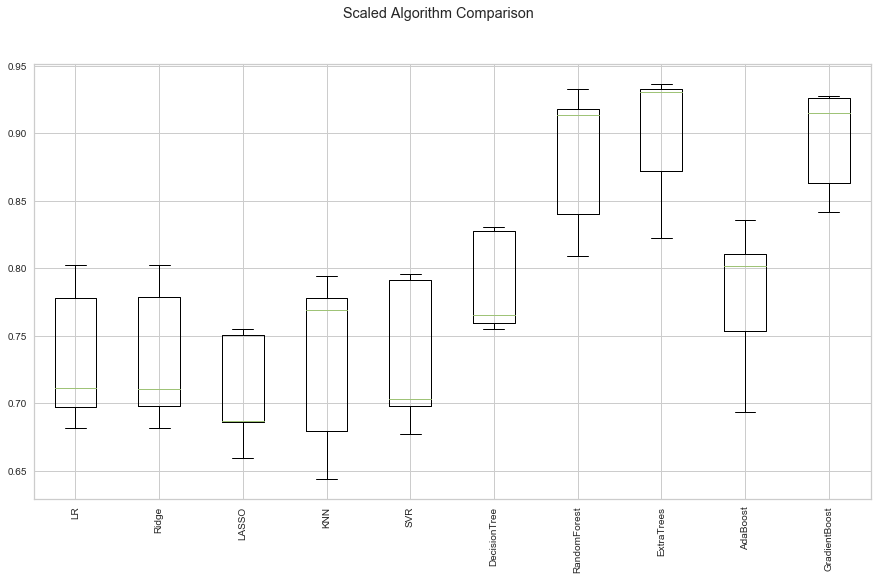

In [27]:
fig = plt.figure(figsize=(15,8))
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(r2_results)
ax.set_xticklabels(names,rotation=90)
plt.show()

### Linear , Lasso and Ridge Regression with Higher Degree

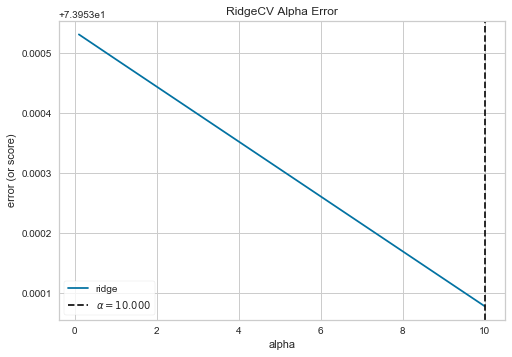

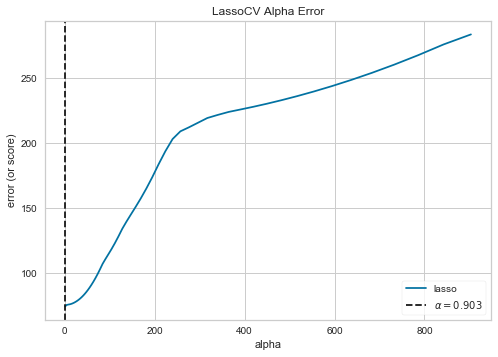

C:\Users\gurup\anaconda3\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


AlphaSelection(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x000002A617A3FD08>,
               model=None)

In [28]:
# Instantiate the linear model and visualizer
alphas(RidgeCV(), X_train, y_train)
alphas(LassoCV(), X_train, y_train)

In [29]:
pipelines = []
for degree in [1,2,3]:
    pipelines.append(('LR-Degree-'+str(degree), Pipeline([('Scaler', StandardScaler()),('Poly',PolynomialFeatures(degree=degree)),('LR',LinearRegression())])))
    pipelines.append(('LASSO-Degree-'+str(degree), Pipeline([('Scaler', StandardScaler()),('Poly',PolynomialFeatures(degree=degree)),('LASSO',Lasso(alpha=0.9))])))
    pipelines.append(('Ridge-Degree-'+str(degree), Pipeline([('Scaler', StandardScaler()),('Poly',PolynomialFeatures(degree=degree)),('Ridge',Ridge(alpha=10))])))

In [30]:
R2_scores_train = []; R2_scores_test = []; RMSE_train = [] ;r2_results = [] 
RMSE_test = []; names=[] ;coeff_ = []

for name, model in pipelines:
    names.append(name)
    #Fit the Model
    model.fit(X_train, y_train)
    # Predict Train
    pred = model.predict(X_train)
    # Evaluate R2 and RMSE for Train
    r2 = round(r2_score(y_train, pred),3); R2_scores_train.append(r2)
    RMSE1 = round(sqrt(mean_squared_error(y_train, pred)),3) ;  RMSE_train.append(RMSE1)
    # Predict Test
    pred = model.predict(X_test)
    # Evaluate R2 and RMSE for Test
    r2 = round(r2_score(y_test, pred),3); R2_scores_test.append(r2)
    RMSE2 = round(sqrt(mean_squared_error(y_test, pred)),3);RMSE_test.append(RMSE2)
    
    coeff_.append(model[2].coef_[1:])

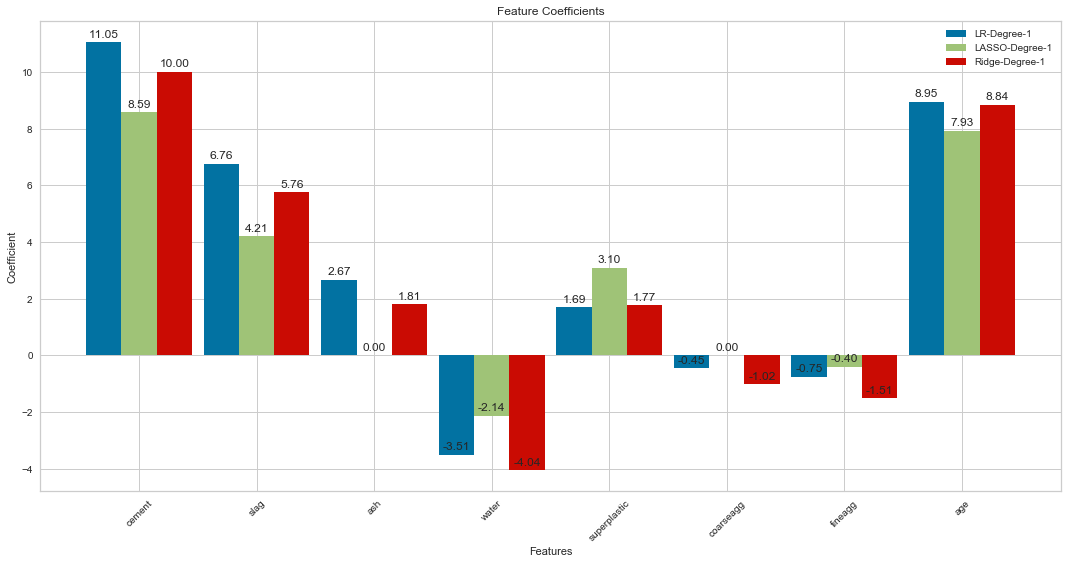

In [31]:
x = np.arange(len(features_list)) 
width = 0.3

fig, ax = plt.subplots(figsize=(15,8))
rects1 = ax.bar(x - 2*(width/2), np.array(coeff_[0]), width, label=names[0])
rects2 = ax.bar(x, coeff_[1], width, label=names[1])
rects3 = ax.bar(x + 2*(width/2), np.array(coeff_[2]), width, label=names[2])

ax.set_ylabel('Coefficient')
ax.set_xlabel('Features')
ax.set_title('Feature Coefficients')
ax.set_xticks(x)
ax.set_xticklabels(features_list, rotation=45)
ax.legend()

def plotlabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2f}'.format(height), xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')
plotlabel(rects1)
plotlabel(rects2)
plotlabel(rects3)

fig.tight_layout()
plt.show()

In [32]:
stats_df = pd.DataFrame([list(R2_scores_train), list(RMSE_train), list(R2_scores_test), list(RMSE_test)],
                    index = ['R2_scores_train','RMSE_train' , 'R2_scores_test', 'RMSE_test'], 
                    columns = names).T
stats_df

,R2_scores_train,RMSE_train,R2_scores_test,RMSE_test
LR-Degree-1,0.747,8.475,0.724,8.577
LASSO-Degree-1,0.720,8.914,0.702,8.908
Ridge-Degree-1,0.746,8.488,0.724,8.579
LR-Degree-2,0.875,5.950,0.839,6.542
LASSO-Degree-2,0.799,7.560,0.786,7.550
Ridge-Degree-2,0.871,6.045,0.837,6.594
LR-Degree-3,0.947,3.894,0.788,7.515
LASSO-Degree-3,0.817,7.203,0.777,7.708
Ridge-Degree-3,0.934,4.338,0.885,5.540


#### Model Complexity - Linear Model with higher degree helps. When we compare Linear vs Non-Linear model, Non Linear model performs better.

In [34]:
# Training and test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
print('Shape of train and test datasets:',X_train.shape, y_train.shape, X_test.shape, y_test.shape)
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Shape of train and test datasets: (721, 8) (721,) (309, 8) (309,)


In [35]:
pipelines = []
pipelines.append(('DecisionTree', Pipeline([('Scaler', StandardScaler()),('DecisionTree',DecisionTreeRegressor())])))
pipelines.append(('RandomForest', Pipeline([('Scaler', StandardScaler()),('RandomForest', RandomForestRegressor())])))
pipelines.append(('ExtraTrees', Pipeline([('Scaler', StandardScaler()),('ExtraTrees', ExtraTreesRegressor())])))
pipelines.append(('AdaBoost', Pipeline([('Scaler', StandardScaler()),('AdaBoost', AdaBoostRegressor())])))
pipelines.append(('GradientBoost', Pipeline([('Scaler', StandardScaler()),('GradientBoost', GradientBoostingRegressor())])))

In [36]:
R2_scores_train = []; R2_scores_test = []; RMSE_train = [] ;r2_results = [] 
RMSE_test = []; names=[] ;feature_ = []

for name, model in pipelines:
    names.append(name)
    #Fit the Model
    model.fit(X_train, y_train)
    # Predict Train
    pred = model.predict(X_train)
    # Evaluate R2 and RMSE for Train
    r2 = round(r2_score(y_train, pred),3); R2_scores_train.append(r2)
    RMSE1 = round(sqrt(mean_squared_error(y_train, pred)),3) ;  RMSE_train.append(RMSE1)
    # Predict Test
    pred = model.predict(X_test)
    # Evaluate R2 and RMSE for Test
    r2 = round(r2_score(y_test, pred),3); R2_scores_test.append(r2)
    RMSE2 = round(sqrt(mean_squared_error(y_test, pred)),3);RMSE_test.append(RMSE2)
    
    feature_.append(model[1].feature_importances_)

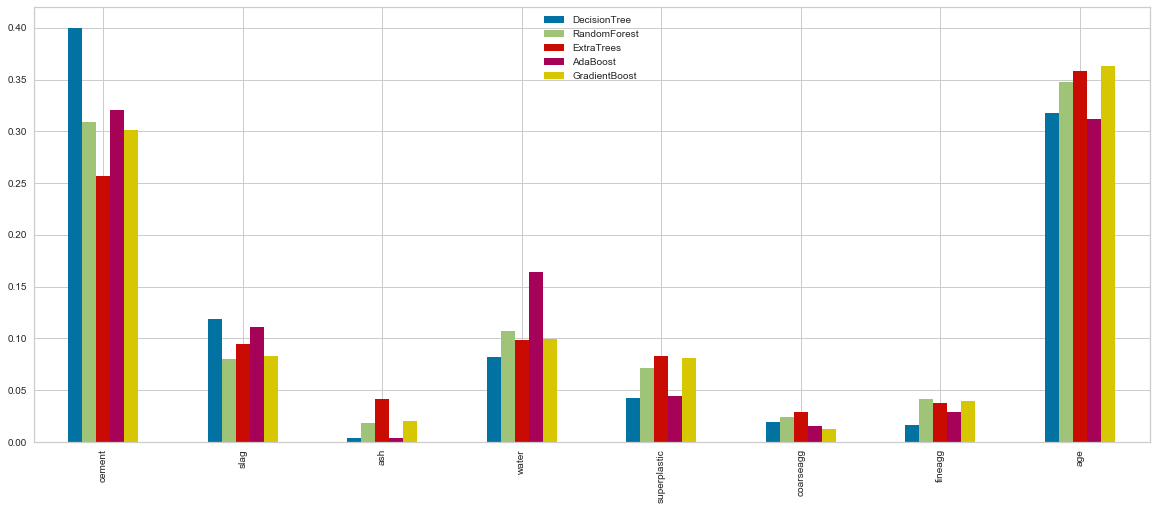

In [37]:
feat_imp_dict = dict(zip(names, feature_))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.columns = features_list
feat_imp.T.plot.bar(figsize=(20,8))

In [38]:
stats_df1 = pd.DataFrame([list(R2_scores_train), list(RMSE_train), list(R2_scores_test), list(RMSE_test)],
                    index = ['R2_scores_train','RMSE_train' , 'R2_scores_test', 'RMSE_test'], 
                    columns = names).T
stats_df1 = stats_df.append(stats_df1,sort=False)
stats_df1

,R2_scores_train,RMSE_train,R2_scores_test,RMSE_test
LR-Degree-1,0.747,8.475,0.724,8.577
LASSO-Degree-1,0.720,8.914,0.702,8.908
Ridge-Degree-1,0.746,8.488,0.724,8.579
LR-Degree-2,0.875,5.950,0.839,6.542
LASSO-Degree-2,0.799,7.560,0.786,7.550
Ridge-Degree-2,0.871,6.045,0.837,6.594
LR-Degree-3,0.947,3.894,0.788,7.515
LASSO-Degree-3,0.817,7.203,0.777,7.708
Ridge-Degree-3,0.934,4.338,0.885,5.540
DecisionTree,0.995,1.224,0.825,6.833


In [44]:
def tree_model_stats(model,name):
    
    R2_scores_train = []; R2_scores_test = []; RMSE_train = [] ;r2_results = [] ;RMSE_test = []

    #Fit the Model
    model.fit(X_train, y_train)
    # Predict Train
    pred = model.predict(X_train)
    # Evaluate R2 and RMSE for Train
    r2 = round(r2_score(y_train, pred),3); R2_scores_train.append(r2)
    RMSE1 = round(sqrt(mean_squared_error(y_train, pred)),3) ;  RMSE_train.append(RMSE1)
    # Predict Test
    pred = model.predict(X_test)
    # Evaluate R2 and RMSE for Test
    r2 = round(r2_score(y_test, pred),3); R2_scores_test.append(r2)
    RMSE2 = round(sqrt(mean_squared_error(y_test, pred)),3);RMSE_test.append(RMSE2)

    df = pd.DataFrame([list(R2_scores_train), list(RMSE_train), list(R2_scores_test), list(RMSE_test)],
                    index = ['R2_scores_train','RMSE_train' , 'R2_scores_test', 'RMSE_test'], 
                    columns = [name]).T
      
    return df   

In [45]:
# Decision Tree Hyperparameters Grid
best_params_grid = {}
param_grid = {'DecisionTree': {'criterion': ['mse', 'mae'], 'max_depth': [2, 3, 4, 5, 6, 7, 8],
                   'max_features': ['auto', 'sqrt','log2',None],'min_samples_split': [20,30,40,50]}}

# Decision Tree Regressor
dt_reg = DecisionTreeRegressor(random_state = 42)
# HyperParameter Tuning
dt_reg_model = GridSearchCV(dt_reg, param_grid['DecisionTree'], cv = 5, n_jobs = -1, verbose = False, scoring = 'r2')
dt_reg_model.fit(X_train, y_train)
# Train and Predict Model
df_reg_model = tree_model_stats(dt_reg_model,name='DecisionTreeReg')
# R2 Score Summary
print(dt_reg_model.best_params_)
stats_df1 = stats_df1.append(df_reg_model,sort=False)
stats_df1

{'criterion': 'mse', 'max_depth': 7, 'max_features': 'auto', 'min_samples_split': 20}


,R2_scores_train,RMSE_train,R2_scores_test,RMSE_test
LR-Degree-1,0.747,8.475,0.724,8.577
LASSO-Degree-1,0.720,8.914,0.702,8.908
Ridge-Degree-1,0.746,8.488,0.724,8.579
LR-Degree-2,0.875,5.950,0.839,6.542
LASSO-Degree-2,0.799,7.560,0.786,7.550
Ridge-Degree-2,0.871,6.045,0.837,6.594
LR-Degree-3,0.947,3.894,0.788,7.515
LASSO-Degree-3,0.817,7.203,0.777,7.708
Ridge-Degree-3,0.934,4.338,0.885,5.540
DecisionTree,0.995,1.224,0.825,6.833


In [46]:
# Random Forest Tree  Hyperparameters Grid
best_params_grid = {}
param_grid = {'RandomForest': {'criterion': ['mse', 'mae'], 'max_depth': [2, 3, 4, 5, 6],
                               'max_features': ['auto', 'sqrt','log2',None],'min_samples_split': [20,30,40,50]}}

# Random Forest Tree  Regressor
rf_reg = RandomForestRegressor(random_state = 42)
rf_reg_model = GridSearchCV(dt_reg, param_grid['RandomForest'], cv = 5, n_jobs = -1, verbose = False, scoring = 'r2')
rf_reg_model.fit(X_train, y_train)
print(rf_reg_model.best_params_)
df_RandomForestReg=tree_model_stats(rf_reg_model,name='RandomForestReg')
stats_df1 = stats_df1.append(df_RandomForestReg,sort=False)
stats_df1

{'criterion': 'mse', 'max_depth': 6, 'max_features': 'auto', 'min_samples_split': 20}


,R2_scores_train,RMSE_train,R2_scores_test,RMSE_test
LR-Degree-1,0.747,8.475,0.724,8.577
LASSO-Degree-1,0.720,8.914,0.702,8.908
Ridge-Degree-1,0.746,8.488,0.724,8.579
LR-Degree-2,0.875,5.950,0.839,6.542
LASSO-Degree-2,0.799,7.560,0.786,7.550
Ridge-Degree-2,0.871,6.045,0.837,6.594
LR-Degree-3,0.947,3.894,0.788,7.515
LASSO-Degree-3,0.817,7.203,0.777,7.708
Ridge-Degree-3,0.934,4.338,0.885,5.540
DecisionTree,0.995,1.224,0.825,6.833


In [47]:
param_grid = {'AdaBoost': {'base_estimator': [DecisionTreeRegressor(random_state = 42, **dt_reg_model.best_params_), None],
                           'n_estimators': [100, 150, 200], 'learning_rate': [0.01, 0.1, 1.0]}}


# AdaBoost Regressor
ada_reg = AdaBoostRegressor()
ada_reg_model = RandomizedSearchCV(ada_reg, param_grid['AdaBoost'], cv = 5, n_jobs = -1, verbose = False, scoring = 'r2')
ada_reg_model.fit(X_train, y_train)
print(ada_reg_model.best_params_)
df_AdaBoostReg=tree_model_stats(ada_reg_model,name='AdaBoostReg')
stats_df1 = stats_df1.append(df_AdaBoostReg,sort=False)
stats_df1

{'n_estimators': 200, 'learning_rate': 0.1, 'base_estimator': DecisionTreeRegressor(max_depth=7, max_features='auto', min_samples_split=20,
                      random_state=42)}


,R2_scores_train,RMSE_train,R2_scores_test,RMSE_test
LR-Degree-1,0.747,8.475,0.724,8.577
LASSO-Degree-1,0.720,8.914,0.702,8.908
Ridge-Degree-1,0.746,8.488,0.724,8.579
LR-Degree-2,0.875,5.950,0.839,6.542
LASSO-Degree-2,0.799,7.560,0.786,7.550
Ridge-Degree-2,0.871,6.045,0.837,6.594
LR-Degree-3,0.947,3.894,0.788,7.515
LASSO-Degree-3,0.817,7.203,0.777,7.708
Ridge-Degree-3,0.934,4.338,0.885,5.540
DecisionTree,0.995,1.224,0.825,6.833


In [48]:
param_grid = {'ExtraTrees': {'n_estimators': [200,300,400,500,600],
          'max_depth': [ 2,3,4,5,6,7,8],
          'max_features': ['auto', 'sqrt'],
          'bootstrap':[True, False]
         }}
et_reg = ExtraTreesRegressor(random_state = 42)
et_reg_model = RandomizedSearchCV(et_reg, param_grid['ExtraTrees'], cv = 5, n_jobs = -1, verbose = False, scoring = 'r2')
et_reg_model.fit(X_train, y_train)
print(et_reg_model.best_params_)
df_ExtraTreesReg=tree_model_stats(et_reg_model,name='ExtraTreesReg')
stats_df1 = stats_df1.append(df_ExtraTreesReg,sort=False)
stats_df1

{'n_estimators': 600, 'max_features': 'auto', 'max_depth': 8, 'bootstrap': False}


,R2_scores_train,RMSE_train,R2_scores_test,RMSE_test
LR-Degree-1,0.747,8.475,0.724,8.577
LASSO-Degree-1,0.720,8.914,0.702,8.908
Ridge-Degree-1,0.746,8.488,0.724,8.579
LR-Degree-2,0.875,5.950,0.839,6.542
LASSO-Degree-2,0.799,7.560,0.786,7.550
Ridge-Degree-2,0.871,6.045,0.837,6.594
LR-Degree-3,0.947,3.894,0.788,7.515
LASSO-Degree-3,0.817,7.203,0.777,7.708
Ridge-Degree-3,0.934,4.338,0.885,5.540
DecisionTree,0.995,1.224,0.825,6.833


In [49]:
param_grid = {'GradientBoost': {'max_depth': [2,3,4,5,6,7,8], 'max_features': ['auto', 'sqrt'], 
                                'n_estimators': [200,300,400,500,600],'min_samples_leaf': [20,30,40,50]}}

# GradientBoostRegressor
gb_reg = GradientBoostingRegressor(random_state = 42)
gb_reg_model = RandomizedSearchCV(gb_reg, param_grid['GradientBoost'], cv = 5, n_jobs = -1, verbose = False, scoring = 'r2')
gb_reg_model.fit(X_train, y_train)
print(gb_reg_model.best_params_)
print(gb_reg_model.get_params)
df_GradientBoostReg=tree_model_stats(gb_reg_model,name='GradientBoostReg')
stats_df1 = stats_df1.append(df_GradientBoostReg,sort=False)
stats_df1

{'n_estimators': 500, 'min_samples_leaf': 20, 'max_features': 'sqrt', 'max_depth': 8}
<bound method BaseEstimator.get_params of RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': [2, 3, 4, 5, 6, 7, 8],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [20, 30, 40, 50],
                                        'n_estimators': [200, 300, 400, 500,
                                                         600]},
                   scoring='r2', verbose=False)>


,R2_scores_train,RMSE_train,R2_scores_test,RMSE_test
LR-Degree-1,0.747,8.475,0.724,8.577
LASSO-Degree-1,0.720,8.914,0.702,8.908
Ridge-Degree-1,0.746,8.488,0.724,8.579
LR-Degree-2,0.875,5.950,0.839,6.542
LASSO-Degree-2,0.799,7.560,0.786,7.550
Ridge-Degree-2,0.871,6.045,0.837,6.594
LR-Degree-3,0.947,3.894,0.788,7.515
LASSO-Degree-3,0.817,7.203,0.777,7.708
Ridge-Degree-3,0.934,4.338,0.885,5.540
DecisionTree,0.995,1.224,0.825,6.833


C:\Users\gurup\anaconda3\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


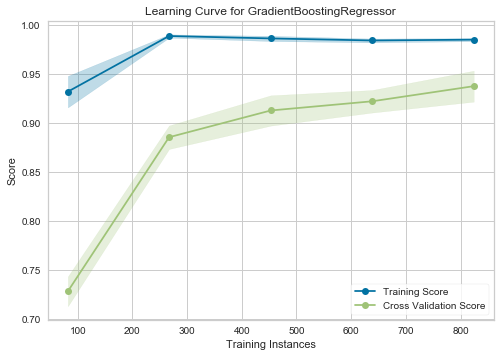

In [50]:
model = GradientBoostingRegressor(random_state = 42, **gb_reg_model.best_params_)

visualizer = LearningCurve(model, scoring='r2')

visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()       

### Gradient Boost Regressor turned out to be the best performing model 

### Bootstrapping Confidence Level

In [51]:
values = df.values
n_iterations = 500 # Number of bootstrap samples to create
n_size = int(len(df) * 1) # size of a bootstrap sample

# run bootstrap
stats = list() # empty list that will hold the scores for each bootstrap iteration
for i in range(n_iterations):
  # prepare train and test sets
  train = resample(values, n_samples = n_size) # Sampling with replacement 
  test = np.array([x for x in values if x.tolist() not in train.tolist()]) # picking rest of the data not considered in sample
  
  # fit model
  gbm_reg = GradientBoostingRegressor(random_state = 42, **gb_reg_model.best_params_)
  gbm_reg.fit(train[:, :-1], train[:, -1]) # fit against independent variables and corresponding target values

  # evaluate model
  predictions = gbm_reg.predict(test[:, :-1]) # predict based on independent variables in the test data
  score = r2_score(test[:, -1], predictions)
  stats.append(score)

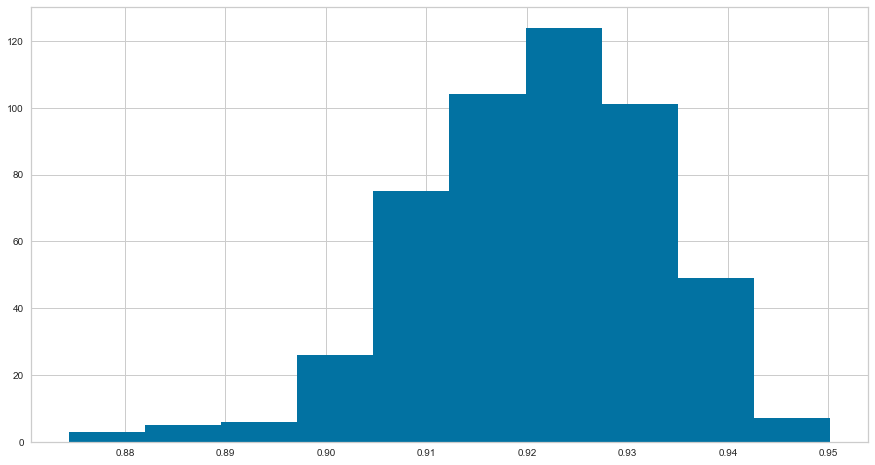

95.0 confidence interval 89.6% and 94.1%


In [52]:
# plot scores
plt.figure(figsize = (15, 8))
plt.hist(stats); plt.show()

# confidence intervals
alpha = 0.95 # for 95% confidence 
p = ((1.0 - alpha) / 2.0) * 100 # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(stats, p))  

p = (alpha + ((1.0 - alpha) / 2.0)) * 100
upper = min(1.0, np.percentile(stats, p))

print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))